In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.graph_objects as go
import pydmd
from sklearn.metrics import mean_absolute_error
from datetime import datetime



In [99]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/nse500i.csv",header=None)
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [112]:
matx

,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
0,7002.500000,7028.750000,7030.750000,7106.899902,7083.100098,7085.149902,7132.200195,7214.149902,7231.850098,7228.299805,...,15530.849610,15615.150390,15567.250000,15440.000000,15649.099610,15650.200200,15693.900390,15663.299800,15597.250000,15550.849610
1,1036.900024,1045.349976,1038.650024,1035.750000,1044.349976,1036.800049,1175.500000,1132.500000,1125.300049,1132.500000,...,3219.899902,3262.350098,3103.899902,3166.899902,3155.850098,3025.199951,3027.850098,3035.649902,3122.199951,3092.649902
2,1351.900024,1343.550049,1319.400024,1332.849976,1333.900024,1327.849976,1319.599976,1348.699951,1341.599976,1329.500000,...,2480.699951,2484.949951,2438.350098,2392.250000,2390.649902,2435.449951,2478.649902,2465.600098,2448.149902,2460.699951
3,1319.250000,1292.400024,1299.949951,1293.849976,1271.650024,1283.550049,1291.800049,1316.050049,1396.750000,1353.099976,...,2739.850098,2716.449951,2638.449951,2629.449951,2593.550049,2731.750000,2674.300049,2604.199951,2575.050049,2659.050049
4,91.970001,92.514999,93.949997,94.190002,95.309998,94.239998,95.099998,96.059998,99.565002,100.955002,...,1099.800049,1098.300049,1061.099976,1046.849976,1050.349976,1084.000000,1073.599976,1088.650024,1092.849976,1081.699951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,666.400024,666.349976,665.599976,673.450012,710.900024,698.500000,699.400024,696.849976,686.150024,695.599976,...,239.199997,238.949997,238.100006,228.750000,225.399994,236.750000,236.949997,237.350006,235.550003,234.250000
457,228.929993,232.580002,232.630005,242.039993,249.350006,251.240005,252.919998,263.570007,265.100006,263.609985,...,16.450001,16.549999,16.549999,16.500000,16.850000,17.100000,17.049999,17.049999,16.950001,16.850000
458,451.600006,458.299988,458.600006,470.700012,463.100006,465.100006,467.750000,478.299988,476.450012,477.549988,...,265.100006,264.399994,262.450012,261.700012,265.850006,259.600006,260.149994,254.750000,252.949997,250.850006
459,39.900002,40.849998,42.950001,43.900002,43.549999,42.799999,45.250000,45.599998,46.549999,46.250000,...,7.100000,7.100000,7.100000,7.200000,7.150000,7.100000,7.100000,7.100000,7.100000,7.050000


In [124]:

import warnings
main_df = pd.DataFrame()
for j in range(10,375,5) :
    df = []
    for i in range(3,25,1) :
        
        # Get the last 20 columns of the DataFrame
        mat = matx.iloc[:, -(i+j):-j]

        # Create a DMD object and fit it to the data
        mat = mat.astype(float)
        cp = mat.iloc[:, -1]

        mat=mat.to_numpy()
        dmd = pydmd.DMD()

        dmd.fit(mat)


        pred = dmd.predict(mat)
        p=pred[:,-1]
        df.append(mean_absolute_error(cp,np.real(p)))
    main_df = pd.concat([main_df, pd.Series(df)], axis=1,)





In [125]:
main_df

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,13.347853,20.618012,20.419173,13.678423,24.261908,35.193168,19.126624,17.779555,17.586180,17.307910,...,20.410929,17.311731,40.316833,14.973079,13.162732,16.522545,13.252288,39.224114,17.551296,17.811576
1,13.890502,21.806046,23.870793,16.435759,31.422935,36.725704,43.483959,20.482170,18.129929,17.834392,...,22.199631,17.912523,34.720081,16.219869,15.790570,17.648278,13.880938,38.738865,17.537029,20.351780
2,16.355459,20.795549,16.037974,17.111944,27.287419,30.180479,27.490616,22.138791,21.005713,19.392537,...,24.301434,19.712407,34.492970,16.917132,19.219156,18.461759,12.404471,18.975547,18.568015,22.164100
3,14.664872,22.425634,16.172406,18.168652,31.773414,29.986591,32.458635,20.929280,17.433792,20.428802,...,19.995487,19.390080,35.609389,16.415040,13.611565,17.551975,13.399431,18.492230,19.523380,18.982438
4,15.305140,22.721238,16.242183,22.191260,29.468915,30.214682,31.937460,21.153395,18.392614,15.565051,...,19.139279,20.655767,35.476517,16.450051,16.098869,17.814913,13.667471,19.510003,20.369763,18.387358
5,12.760661,31.529085,17.115907,19.970440,24.506839,18.407446,31.443386,21.228837,18.660231,16.284380,...,23.680599,22.478735,34.933592,15.896161,12.928318,18.330482,14.982912,18.951119,20.948044,18.706786
6,13.117043,25.565775,15.333987,21.229883,26.584866,22.779271,43.239367,22.452699,17.876833,17.262954,...,20.122458,21.446564,34.549175,16.041153,14.231459,17.906226,14.851172,20.436075,22.565182,20.368499
7,14.849054,28.511324,15.301700,19.610602,19.866443,25.004232,44.725068,22.764115,19.167604,18.451597,...,21.198998,19.162243,34.045952,16.216142,15.659738,17.071188,14.978550,19.061700,23.817582,20.284185
8,15.561422,27.993786,13.217248,21.161295,17.591290,22.685551,44.257618,22.795461,19.567132,17.074132,...,24.352198,19.259592,35.243837,16.693279,14.106106,18.670187,13.778780,18.662040,22.133921,23.666379
9,12.453035,23.579195,12.200539,17.975105,18.006840,24.050021,29.832891,20.990469,20.518833,17.511546,...,28.513237,19.262583,48.967518,17.746975,14.602281,16.567338,14.583831,21.705076,23.119316,17.798862


In [128]:
name = str(datetime.now().strftime("%Y%m%d%H%M%S"))
main_df.to_csv(name+"ver1.csv", index=False)

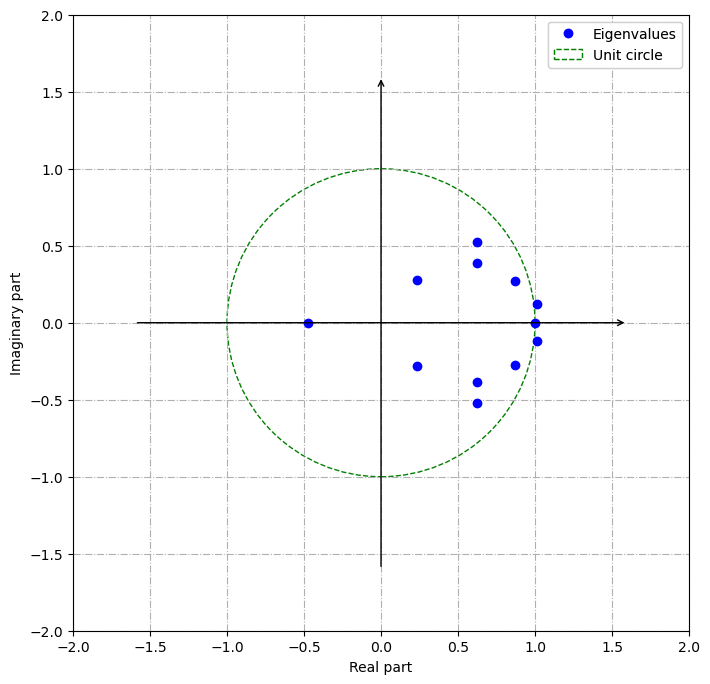

In [102]:
dmd.plot_eigs(show_axes=True, show_unit_circle=True)

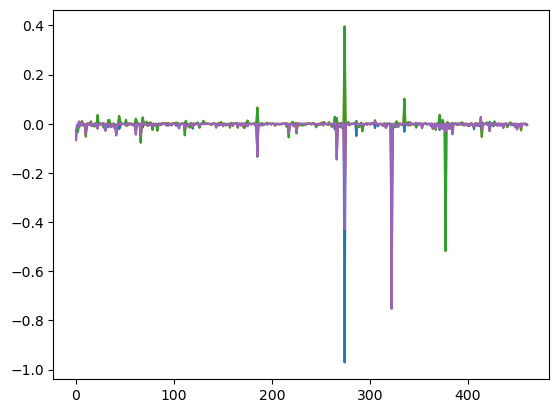

In [103]:
# plot First Five Modes
plt.plot(np.real(dmd.modes[:, :5]))

In [105]:
modes = dmd.modes
modes.shape

(461, 12)